In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Cargar el dataset desde el archivo subido
data = pd.read_csv('/content/spambase.data', header=None)

# Explorar los primeros datos
print(data.head())


     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


In [4]:
# Separar las características (X) y la etiqueta (y)
X = data.iloc[:, :-1]  # Todas las columnas menos la última
y = data.iloc[:, -1]   # La última columna es la etiqueta de spam/no spam

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)


In [7]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Tasa de error
error_rate = 1 - accuracy

# Tasa de positivos verdaderos (Recall)
recall = recall_score(y_test, y_pred)

# Precisión
precision = precision_score(y_test, y_pred)

# F1-Score
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print(f"Exactitud: {accuracy}")
print(f"Tasa de error: {error_rate}")
print(f"Precisión: {precision}")
print(f"Recall (Tasa de positivos verdaderos): {recall}")
print(f"F1-Score: {f1}")


Exactitud: 0.9554831704668838
Tasa de error: 0.0445168295331162
Precisión: 0.9754768392370572
Recall (Tasa de positivos verdaderos): 0.9179487179487179
F1-Score: 0.9458388375165125


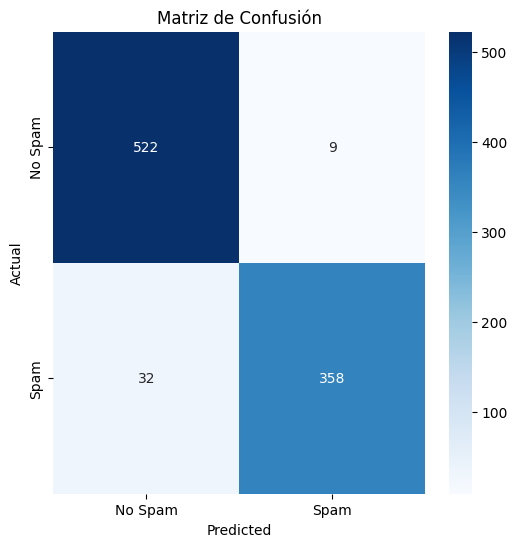

In [8]:
# Visualizar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


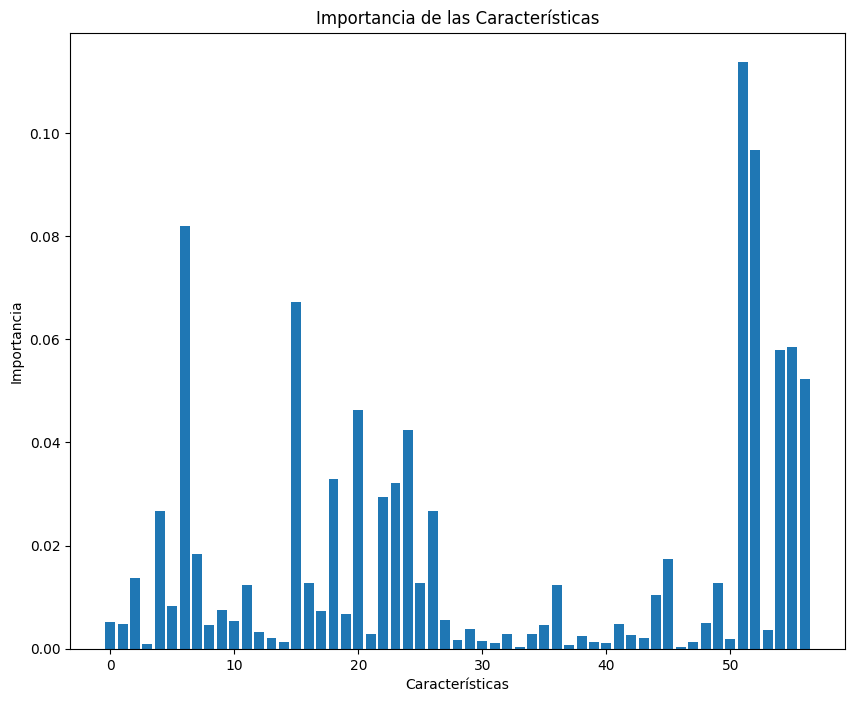

In [9]:
# Obtener las características más importantes
importances = model.feature_importances_

# Visualizar las características más importantes
plt.figure(figsize=(10,8))
plt.bar(range(X.shape[1]), importances)
plt.title('Importancia de las Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()
